![](http://www.homecredit.net/~/media/Images/H/Home-Credit-Group/image-gallery/full/image-gallery-01-11-2016-b.png)

# <a id='1'>1. Introduction</a>

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

 # <a id='2'>2. Retrieving the Data</a>

In [2]:
# Librairies personnalisées
from my_functions.common_functions import *
from my_functions.uni_bi_variate_functions import *
from my_functions.machine_learning_common_functions import *
from my_functions.dimensionality_reduction_functions import *

import gc
import re
import time
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
# from plotly import tools
# import plotly.tools as tls
# import squarify
# from mpl_toolkits.basemap import Basemap
# from numpy import array
# from matplotlib import cm

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()

# from sklearn import preprocessing
# # Supress unnecessary warnings so that presentation looks clean
# import warnings
# warnings.filterwarnings("ignore")

In [3]:
import os
path_data = './Projet+Mise+en+prod+-+home-credit-default-risk/'
files = os.listdir(path_data)
print(files)

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [4]:
# Remove the useless files
for name in ['application_test.csv', 'sample_submission.csv', 'HomeCredit_columns_description.csv']:
    if name in files:
        files.remove(name)

In [5]:
dfs = {}
for file in files:
    print('Loading:', file, '...')
    dfs[file.replace('.csv','')] = pd.read_csv(path_data+file)
print('All data loaded.')

Loading: application_train.csv ...
Loading: bureau.csv ...
Loading: bureau_balance.csv ...
Loading: credit_card_balance.csv ...
Loading: installments_payments.csv ...
Loading: POS_CASH_balance.csv ...
Loading: previous_application.csv ...
All data loaded.


>>>>>>>>>> application_train >>>>>>>>>>
Le data set contient :
	- 307509 lignes et 122 colonnes.
	- 9152403 valeurs manquantes, ce qui représente 24.4 % du data set.


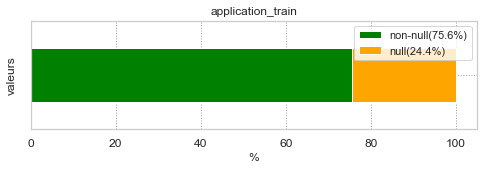

Voici les colonnes avec NaNs:


0            1                2           3            4   \
Column    GENDER  AMT_ANNUITY  AMT_GOODS_PRICE  TYPE_SUITE  OWN_CAR_AGE   
#NaN           4           12              276        1290       202927   
%NaN         0.0          0.0             0.09        0.42        65.99   
#Not_NaN  307505       307497           307233      306219       104582   
%Not_NaN   100.0        100.0            99.91       99.58        34.01   

                       5             6             7             8   \
Column    OCCUPATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3   
#NaN                96391        173377           660         60964   
%NaN                31.35         56.38          0.21         19.83   
#Not_NaN           211118        134132        306849        246545   
%Not_NaN            68.65         43.62         99.79         80.17   

                      9                 10                           11  \
Column    APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG   
#NaN              156060            179942                       150006   
%NaN               50.75             58.52                        48.78   
#Not_NaN          151449            127567                       157503   
%Not_NaN           49.25             41.48                        51.22   

                       12              13             14             15  \
Column    YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG   
#NaN               204487          214864         163890         154827   
%NaN                 66.5           69.87           53.3          50.35   
#Not_NaN           103022           92645         143619         152682   
%Not_NaN             33.5           30.13           46.7          49.65   

                     16             17            18                    19  \
Column    FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG   
#NaN             153019         208641        182588                210198   
%NaN              49.76          67.85         59.38                 68.36   
#Not_NaN         154490          98868        124921                 97311   
%Not_NaN          50.24          32.15         40.62                 31.64   

                      20                       21                 22  \
Column    LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG   
#NaN              154349                   213513             169681   
%NaN               50.19                    69.43              55.18   
#Not_NaN          153160                    93996             137828   
%Not_NaN           49.81                    30.57              44.82   

                       23                 24                            25  \
Column    APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE   
#NaN               156060             179942                        150006   
%NaN                50.75              58.52                         48.78   
#Not_NaN           151449             127567                        157503   
%Not_NaN            49.25              41.48                         51.22   

                        26               27              28              29  \
Column    YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE   
#NaN                204487           214864          163890          154827   
%NaN                  66.5            69.87            53.3           50.35   
#Not_NaN            103022            92645          143619          152682   
%Not_NaN              33.5            30.13            46.7           49.65   

                      30              31             32  \
Column    FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE   
#NaN              153019          208641         182588   
%NaN               49.76           67.85          59.38   
#Not_NaN          154490           98868         124921   
%Not_NaN           50.24           32.15          40.62   

                             33  

Voici un sous-échantillon aléatoire :


SK_ID_CURR  TARGET CONTRACT_TYPE GENDER OWN_CAR OWN_REALTY  \
94578       209819       0    Cash loans      F       Y          Y   
110777      228516       0    Cash loans      M       Y          Y   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
94578              1          292500.0    292500.0      30843.0   
110777             1          157500.0    310671.0      19984.5   

        AMT_GOODS_PRICE     TYPE_SUITE           INCOME_TYPE  \
94578          292500.0  Unaccompanied  Commercial associate   
110777         256500.0  Unaccompanied               Working   

          EDUCATION_TYPE         FAMILY_STATUS       HOUSING_TYPE  \
94578   Higher education               Married  House / apartment   
110777   Lower secondary  Single / not married   Rented apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
94578                     0.072508      -10472          -3246   
110777                    0.009657      -13609           -661   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
94578             -5234.0            -2011          7.0           1   
110777             -338.0            -2194         12.0           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
94578                1                1                 1           1   
110777               1                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
94578            0      Core staff              3.0                     1   
110777           0        Laborers              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
94578                             1                   THURSDAY   
110777                            2                   SATURDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
94578                        16                           0   
110777                       12                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
94578                            0                            0   
110777                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
94578                        0                       0   
110777                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  \
94578                         0          Legal Services           NaN   
110777                        0  Business Entity Type 3      0.226236   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
94578       0.666685      0.627991          0.1155            0.0443   
110777      0.421320           NaN          0.0619            0.0505   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
94578                        0.9801           0.7280          0.0707   
110777                       0.9757           0.6668          0.0043   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
94578            0.08         0.0345         0.6250         0.6667   
110777           0.00         0.1034         0.1667         0.2083   

        LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
94578         0.0000                0.0933          0.1058   
110777        0.0508                0.0488          0.0307   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
94578                    0.0039             0.0013           0.1176   
110777                   0.0077             0.0000           0.0630   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
94578              0.0459                        0.9801            0.7387   
110777             0.0524                        0.9757            0.6798   

        COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_M

Doublons: 0
>>>>>>>>>> bureau >>>>>>>>>>
Le data set contient :
	- 1716428 lignes et 17 colonnes.
	- 3939947 valeurs manquantes, ce qui représente 13.5 % du data set.


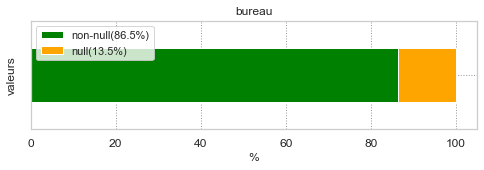

Voici les colonnes avec NaNs:


0                  1                       2  \
Column    DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE   
#NaN                   105553             633653                 1124488   
%NaN                     6.15              36.92                   65.51   
#Not_NaN              1610875            1082775                  591940   
%Not_NaN                93.85              63.08                   34.49   

                       3                    4                     5  \
Column    AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT   
#NaN                  13               257669                591780   
%NaN                 0.0                15.01                 34.48   
#Not_NaN         1716415              1458759               1124648   
%Not_NaN           100.0                84.99                 65.52   

                    6  
Column    AMT_ANNUITY  
#NaN          1226791  
%NaN            71.47  
#Not_NaN       489637  
%Not_NaN        28.53

Voici un sous-échantillon aléatoire :


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
103259       221165       5264966        Active      currency 1         -289   
1084442      158977       6117250        Closed      currency 1         -168   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
103259                    0               4111.0                NaN   
1084442                   0                  NaN             -154.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
103259                      NaN                   0       2615449.5   
1084442                     NaN                   0         22500.0   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
103259             1852969.5                   0.0                     0.0   
1084442                  0.0                   NaN                     0.0   

        CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
103259     Mortgage                 -24     242095.5  
1084442   Microloan                -154          0.0

Doublons: 1410617
>>>>>>>>>> bureau_balance >>>>>>>>>>
Le data set contient :
	- 27299925 lignes et 3 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.


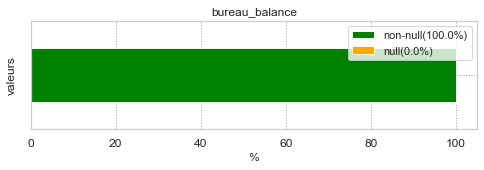

Voici un sous-échantillon aléatoire :


SK_ID_BUREAU  MONTHS_BALANCE STATUS
2546234       6371775              -8      0
4018941       5897351             -21      X

Doublons: 26482530
>>>>>>>>>> credit_card_balance >>>>>>>>>>
Le data set contient :
	- 3840312 lignes et 23 colonnes.
	- 5877356 valeurs manquantes, ce qui représente 6.65 % du data set.


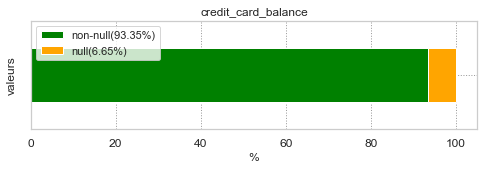

Voici les colonnes avec NaNs:


0                           1  \
Column    AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_OTHER_CURRENT   
#NaN                        749816                      749816   
%NaN                         19.52                       19.52   
#Not_NaN                   3090496                     3090496   
%Not_NaN                     80.48                       80.48   

                                 2                        3  \
Column    AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY   
#NaN                        749816                   305236   
%NaN                         19.52                     7.95   
#Not_NaN                   3090496                  3535076   
%Not_NaN                     80.48                    92.05   

                            4                         5  \
Column    AMT_PAYMENT_CURRENT  CNT_DRAWINGS_ATM_CURRENT   
#NaN                   767988                    749816   
%NaN                     20.0                     19.52   
#Not_NaN              3072324                   3090496   
%Not_NaN                 80.0                     80.48   

                                   6                         7  \
Column    CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT   
#NaN                          749816                    749816   
%NaN                           19.52                     19.52   
#Not_NaN                     3090496                   3090496   
%Not_NaN                       80.48                     80.48   

                                  8  
Column    CNT_INSTALMENT_MATURE_CUM  
#NaN                         305236  
%NaN                           7.95  
#Not_NaN                    3535076  
%Not_NaN                      92.05

Voici un sous-échantillon aléatoire :


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
2957559     1156807      280520             -31          0.0   
83833       1130667      203180             -29          0.0   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
2957559                    67500                       0.0   
83833                     112500                       0.0   

         AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
2957559                   0.0                         0.0   
83833                     0.0                         0.0   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  \
2957559                       0.0                      0.0   
83833                         0.0                      0.0   

         AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
2957559                1.755                        0.0   
83833                179.460                        0.0   

         AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
2957559                       0.0            0.0                   0.0   
83833                         0.0            0.0                   0.0   

         CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
2957559                       0.0                     0   
83833                         0.0                     0   

         CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
2957559                         0.0                       0.0   
83833                           0.0                       0.0   

         CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
2957559                       59.0               Active       0           0  
83833                         50.0               Active       0           0

Doublons: 3736005
>>>>>>>>>> installments_payments >>>>>>>>>>
Le data set contient :
	- 13605401 lignes et 8 colonnes.
	- 5810 valeurs manquantes, ce qui représente 0.01 % du data set.


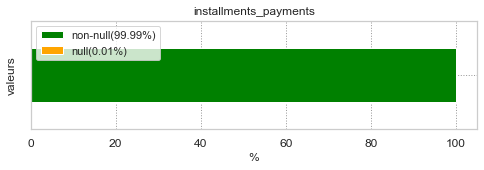

Voici les colonnes avec NaNs:


0            1
Column    DAYS_ENTRY_PAYMENT  AMT_PAYMENT
#NaN                    2905         2905
%NaN                    0.02         0.02
#Not_NaN            13602496     13602496
%Not_NaN               99.98        99.98

Voici un sous-échantillon aléatoire :


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
7466944     2662793      226319                     1.0   
2774626     2687479      116536                     1.0   

         NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
7466944                     10           -429.0              -455.0   
2774626                      3           -979.0              -993.0   

         AMT_INSTALMENT  AMT_PAYMENT  
7466944       11617.245       83.700  
2774626        8544.015     8544.015

Doublons: 12607649
>>>>>>>>>> POS_CASH_balance >>>>>>>>>>
Le data set contient :
	- 10001358 lignes et 8 colonnes.
	- 52158 valeurs manquantes, ce qui représente 0.07 % du data set.


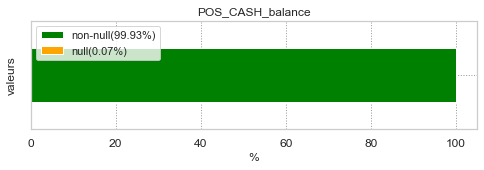

Voici les colonnes avec NaNs:


0                      1
Column    CNT_INSTALMENT  CNT_INSTALMENT_FUTURE
#NaN               26071                  26087
%NaN                0.26                   0.26
#Not_NaN         9975287                9975271
%Not_NaN           99.74                  99.74

Voici un sous-échantillon aléatoire :


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
9982614     2023129      355824              -6            23.0   
1985822     2299451      447588             -11            36.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
9982614                    3.0               Active       0           0  
1985822                   25.0               Active       0           0

Doublons: 9065033
>>>>>>>>>> previous_application >>>>>>>>>>
Le data set contient :
	- 1670214 lignes et 37 colonnes.
	- 11109336 valeurs manquantes, ce qui représente 17.98 % du data set.


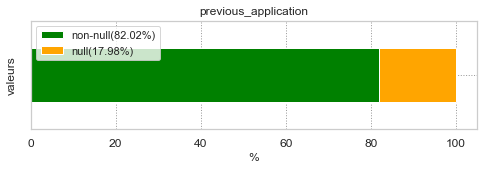

Voici les colonnes avec NaNs:


0                 1                2                  3   \
Column    AMT_ANNUITY  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  RATE_DOWN_PAYMENT   
#NaN           372235            895844           385515             895844   
%NaN            22.29             53.64            23.08              53.64   
#Not_NaN      1297979            774370          1284699             774370   
%Not_NaN        77.71             46.36            76.92              46.36   

                             4                         5                6   \
Column    RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  NAME_TYPE_SUITE   
#NaN                    1664263                   1664263           820405   
%NaN                      99.64                     99.64            49.12   
#Not_NaN                   5951                      5951           849809   
%Not_NaN                   0.36                      0.36            50.88   

                   7                    8                   9   \
Column    CNT_PAYMENT  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING   
#NaN           372230                  346              673065   
%NaN            22.29                 0.02                40.3   
#Not_NaN      1297984              1669868              997149   
%Not_NaN        77.71                99.98                59.7   

                      10                         11             12  \
Column    DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE   
#NaN              673065                     673065         673065   
%NaN                40.3                       40.3           40.3   
#Not_NaN          997149                     997149         997149   
%Not_NaN            59.7                       59.7           59.7   

                        13                         14  
Column    DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
#NaN                673065                     673065  
%NaN                  40.3                       40.3  
#Not_NaN            997149                     997149  
%Not_NaN              59.7                       59.7

Voici un sous-échantillon aléatoire :


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1344535     2337501      234054         Cash loans    21298.275   
97874       1060585      266124     Consumer loans     3293.460   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1344535         225000.0    269550.0               NaN         225000.0   
97874            28341.0     31333.5               0.0          28341.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1344535                    TUESDAY                        3   
97874                     SATURDAY                       13   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1344535                           Y                       1   
97874                             Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1344535                NaN                    NaN                       NaN   
97874                  0.0                    NaN                       NaN   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
1344535                    XNA              Refused           -263   
97874                      XAP             Approved           -751   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
1344535  Cash through the bank                 HC   Unaccompanied   
97874    Cash through the bank                XAP         Other_B   

        NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
1344535        Refreshed                 XNA           Cash            x-sell   
97874           Repeater         Audio/Video            POS               XNA   

                    CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  \
1344535  Credit and cash offices                -1                   XNA   
97874               Country-wide              1000  Consumer electronics   

         CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  \
1344535         18.0           middle          Cash X-Sell: middle   
97874           12.0           middle  POS household with interest   

         DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
1344535                 NaN             NaN                        NaN   
97874              365243.0          -720.0                     -390.0   

         DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
1344535            NaN               NaN                        NaN  
97874           -570.0            -567.0                        0.0

Doublons: 0


In [37]:
# for name, df in dfs.items():
#     print('>>>>>>>>>>', name, '>>>>>>>>>>')
#     verifier_taille(df, name)
#     afficher_echantillon(df)
#     print('Doublons:', len(doublons(df[df.columns[0]])))

# <a id='5'> Data Exploration & Cleanning</a>

## Application Data

### Qualitative Variables

#### <a id='5-1'> Target Balance</a>

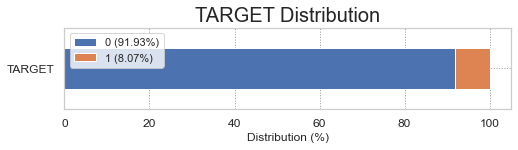

In [8]:
plotBalance(dfs['application_train'], ['TARGET'])

#### <a href="2.3"> Contract Type</a>

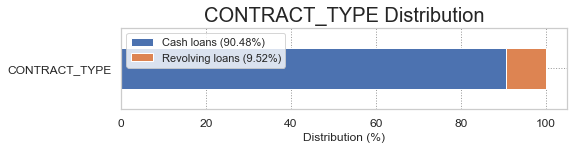

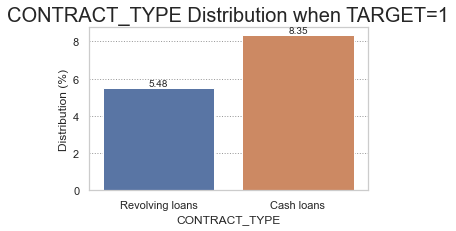

p-value is:  1.074252684403156e-65
chi=293.054104, critical value=3.841459
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


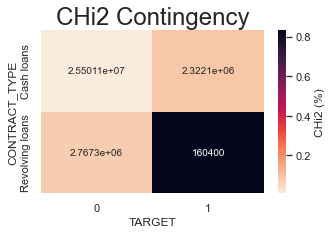

In [29]:
dfs['application_train'] = renameCol(dfs['application_train'], 'NAME_CONTRACT_TYPE', 'CONTRACT_TYPE')

plotBalance(dfs['application_train'], ['CONTRACT_TYPE'])
plotBalance(dfs['application_train'], ['TARGET', 'CONTRACT_TYPE', 'SK_ID_CURR'], mask=1, heigth=3, width=5)
chi2(dfs['application_train'], 'CONTRACT_TYPE', 'TARGET', heigth=3, width=5)

#### <a href="2.3"> Gender Type of Applicants </a>

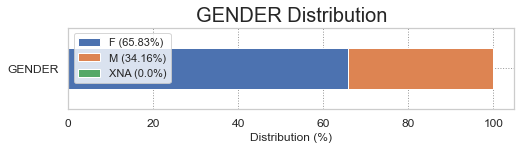

In [10]:
dfs['application_train'] = renameCol(dfs['application_train'], 'CODE_GENDER', 'GENDER')
plotBalance(dfs['application_train'], ['GENDER'])

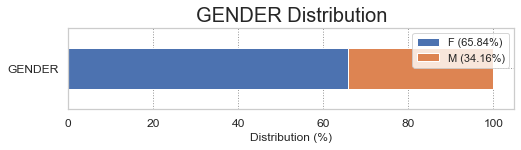

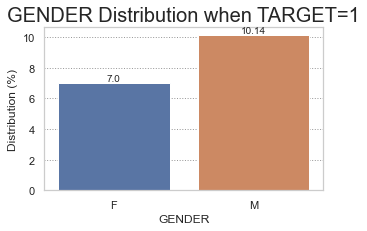

p-value is:  4.394091339983112e-202
chi=920.005725, critical value=3.841459
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


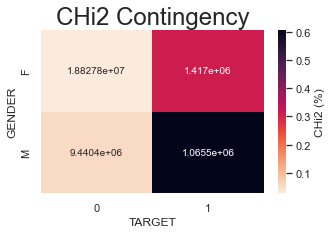

In [11]:
dfs['application_train']['GENDER'].replace('XNA', np.nan, inplace=True)

plotBalance(dfs['application_train'], ['GENDER'])
plotBalance(dfs['application_train'], ['TARGET', 'GENDER', 'SK_ID_CURR'], mask=1, heigth=3, width=5)
chi2(dfs['application_train'], 'GENDER', 'TARGET', heigth=3, width=5)

#### <a href="2.4"> Family Status of Applicants </a>

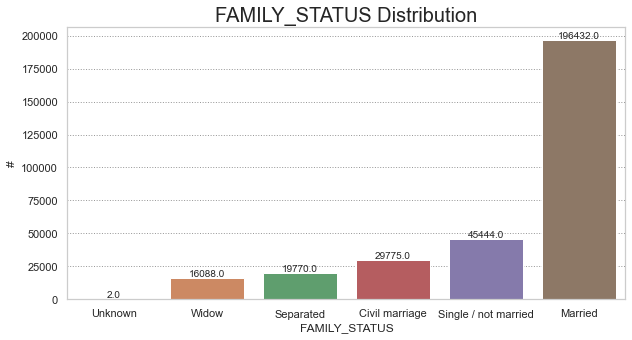

In [12]:
dfs['application_train'] = renameCol(dfs['application_train'], 'NAME_FAMILY_STATUS', 'FAMILY_STATUS')
barplotDistribution(dfs['application_train']['FAMILY_STATUS'])

In [13]:
dfs['application_train'][dfs['application_train']['FAMILY_STATUS']=='Unknown']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans      M            N   
187348      317181       0    Revolving loans      F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN             NaN  Commercial associate   
187348      29250.0              NaN             NaN  Commercial associate   

       NAME_EDUCATION_TYPE FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary       Unknown  Municipal apartment   
187348    Higher education       Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221      -12396          -1161   
187348                    0.031329      -12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
41982             -3265.0            -4489          NaN           1   
187348            -1597.0            -1571          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
41982                1                1                 1           1   
187348               1                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982            0        Managers              NaN                     2   
187348           0     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  \
41982                         1               Insurance      0.628564   
187348                        0  Business Entity Type 2           NaN   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
41982       0.700618           NaN             NaN               NaN   
187348      0.645168      0.670652          0.1031            0.0467   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
41982                           NaN              NaN             NaN   
187348                        0.997           0.9592          0.0081   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
41982             NaN            NaN            NaN            NaN   
187348           0.08          0.069          0.375         0.4167   

        LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
41982            NaN                   NaN             NaN   
187348           NaN                0.0841           0.088   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
41982                       NaN                NaN              NaN   
187348                      0.0                0.0            0.105   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
41982                 NaN                           NaN               NaN   
187348             0.0485                         0.997            0.9608   

        COMMONAREA_MODE  ELEVATO

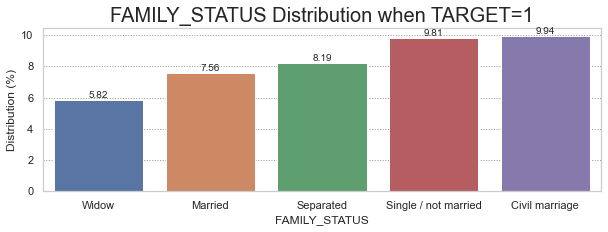

p-value is:  7.07008034624966e-108
chi=504.515452, critical value=9.487729
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


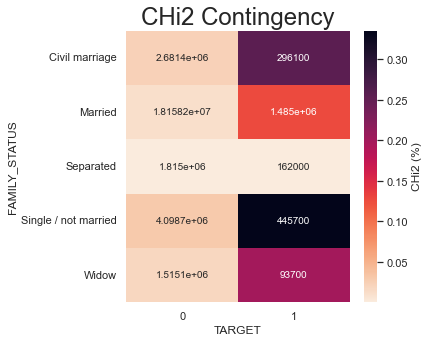

In [14]:
# Remove the 2 Unknowns
dfs['application_train'] = dfs['application_train'][dfs['application_train']['FAMILY_STATUS']!='Unknown']

plotBalance(dfs['application_train'], ['TARGET', 'FAMILY_STATUS', 'SK_ID_CURR'], mask=1, heigth=3)
chi2(dfs['application_train'], 'FAMILY_STATUS', 'TARGET', heigth=5, width=5)

#### <a id='5-4'> Who accompanied client when applying for the  application</a>

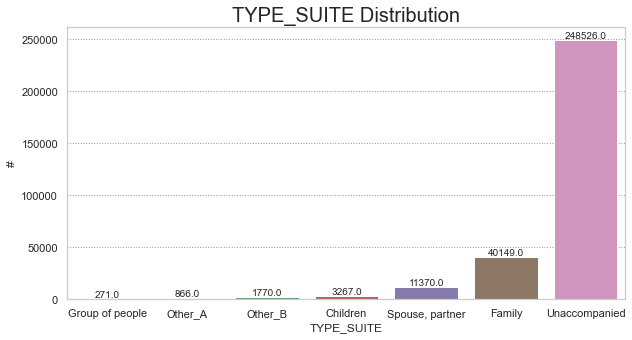

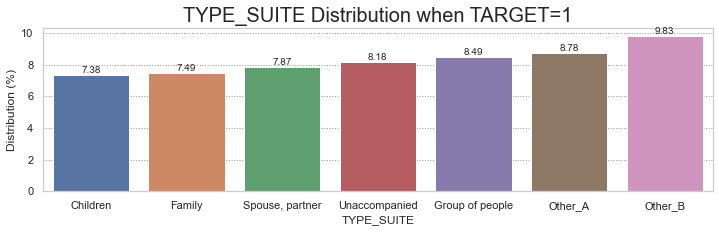

p-value is:  1.1329313903575907e-05
chi=32.825315, critical value=12.591587
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


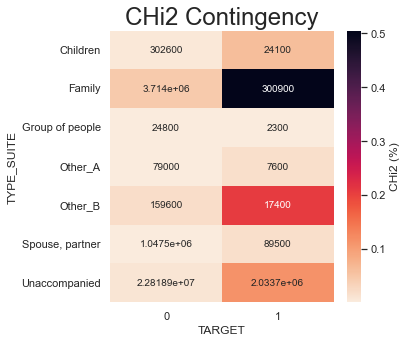

In [15]:
dfs['application_train'] = renameCol(dfs['application_train'], 'NAME_TYPE_SUITE', 'TYPE_SUITE')

barplotDistribution(dfs['application_train']['TYPE_SUITE'])
plotBalance(dfs['application_train'], ['TARGET', 'TYPE_SUITE', 'SK_ID_CURR'], mask=1, heigth=3, width=12)
chi2(dfs['application_train'], 'TYPE_SUITE', 'TARGET', heigth=5, width=5)

#### <a id='5-14-1'> Income sources of Applicants</a>

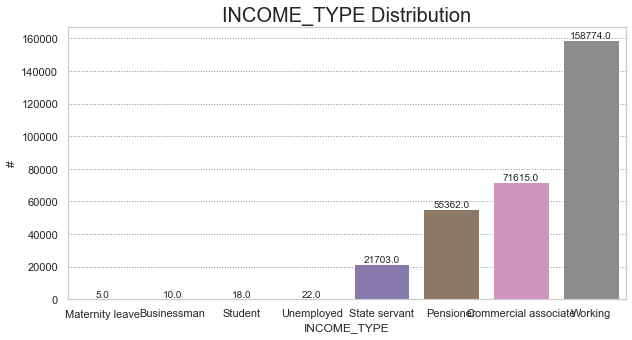

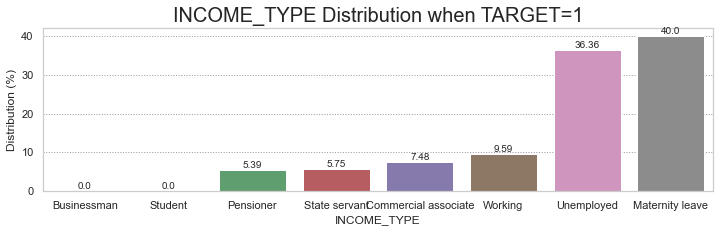

p-value is:  1.9592286458277544e-266
chi=1253.438696, critical value=14.067140
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


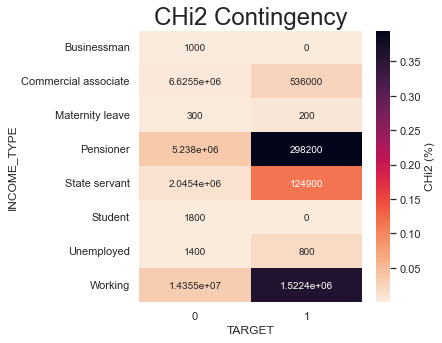

In [16]:
dfs['application_train'] = renameCol(dfs['application_train'], 'NAME_INCOME_TYPE', 'INCOME_TYPE')

barplotDistribution(dfs['application_train']['INCOME_TYPE'])
plotBalance(dfs['application_train'], ['TARGET', 'INCOME_TYPE', 'SK_ID_CURR'], mask=1, heigth=3, width=12)
chi2(dfs['application_train'], 'INCOME_TYPE', 'TARGET', heigth=5, width=5)

#### <a id='5-11'> Education of Applicants</a>

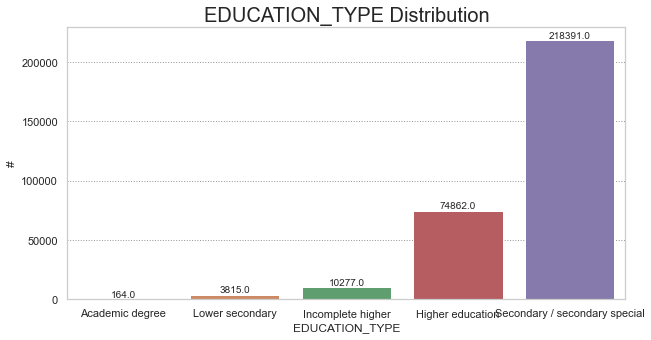

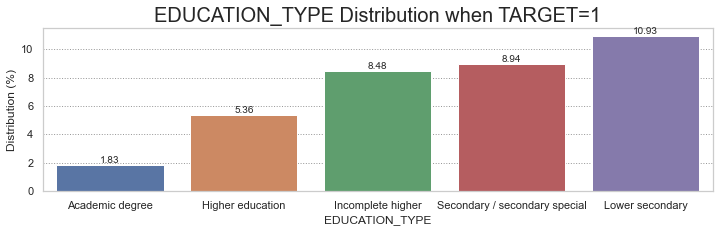

p-value is:  2.425901732219507e-219
chi=1019.231098, critical value=9.487729
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


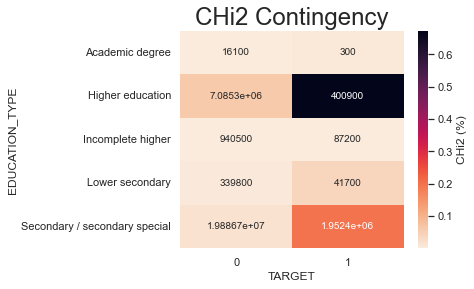

In [17]:
dfs['application_train'] = renameCol(dfs['application_train'], 'NAME_EDUCATION_TYPE', 'EDUCATION_TYPE')

barplotDistribution(dfs['application_train']['EDUCATION_TYPE'])
plotBalance(dfs['application_train'], ['TARGET', 'EDUCATION_TYPE', 'SK_ID_CURR'], mask=1, heigth=3, width=12)
chi2(dfs['application_train'], 'EDUCATION_TYPE', 'TARGET', heigth=4, width=5)

#### <a id="2.8"> Housing of Applicants </a>

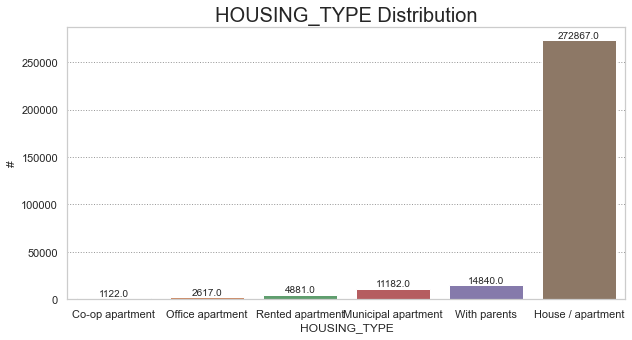

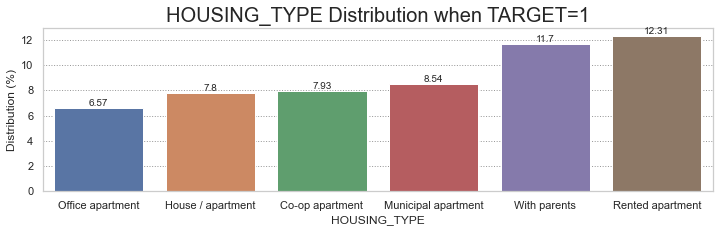

p-value is:  1.0979779880753129e-88
chi=420.558227, critical value=11.070498
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


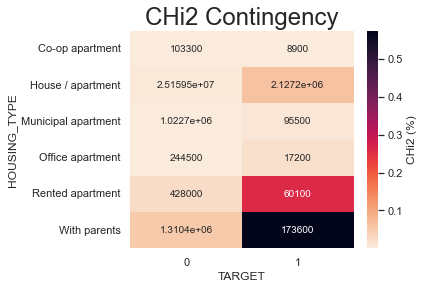

In [18]:
dfs['application_train'] = renameCol(dfs['application_train'], 'NAME_HOUSING_TYPE', 'HOUSING_TYPE')

barplotDistribution(dfs['application_train']['HOUSING_TYPE'])
plotBalance(dfs['application_train'], ['TARGET', 'HOUSING_TYPE', 'SK_ID_CURR'], mask=1, heigth=3, width=12)
chi2(dfs['application_train'], 'HOUSING_TYPE', 'TARGET', heigth=4, width=5)

#### Occupation of Applicants

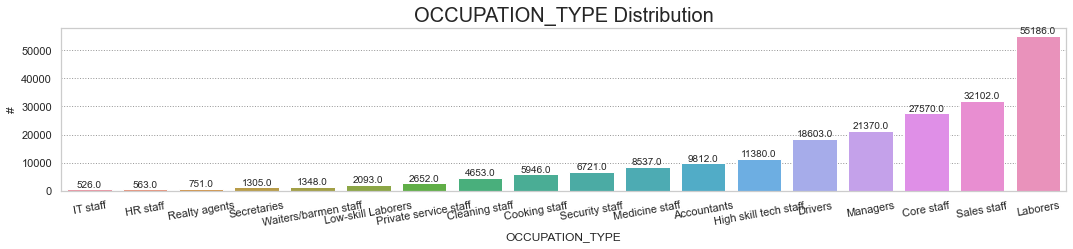

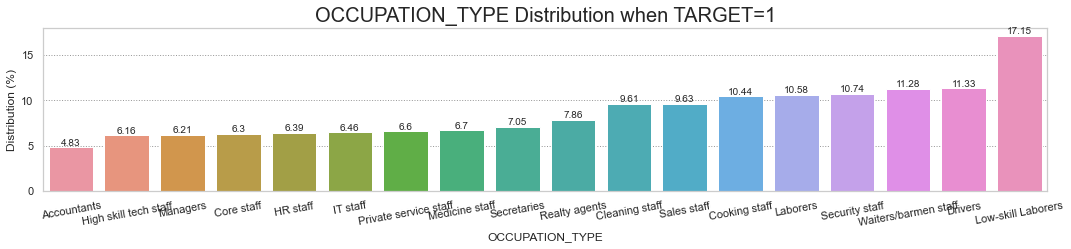

p-value is:  4.030522062343383e-288
chi=1402.719472, critical value=27.587112
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


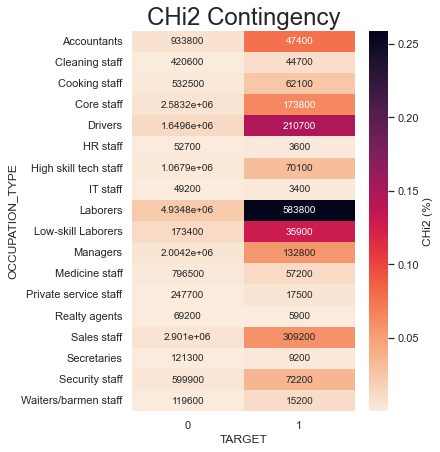

In [19]:
barplotDistribution(dfs['application_train']['OCCUPATION_TYPE'], heigth=3, width=18, rotation=10)
plotBalance(dfs['application_train'], ['TARGET', 'OCCUPATION_TYPE', 'SK_ID_CURR'], mask=1, heigth=3, width=18, rotation=10)
chi2(dfs['application_train'], 'OCCUPATION_TYPE', 'TARGET', heigth=7, width=5)

#### Organization Type of Applicants

In [ ]:
barplotDistribution(dfs['application_train']['ORGANIZATION_TYPE'], heigth=3, width=40, rotation=10, orient='h')
plotBalance(dfs['application_train'], ['TARGET', 'ORGANIZATION_TYPE', 'SK_ID_CURR'], mask=1, heigth=3, width=40, rotation=10, orient='h')
chi2(dfs['application_train'], 'ORGANIZATION_TYPE', 'TARGET', heigth=10, width=5)

#### Car Ownership of Applicants

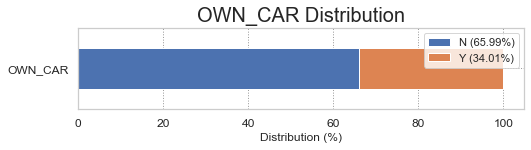

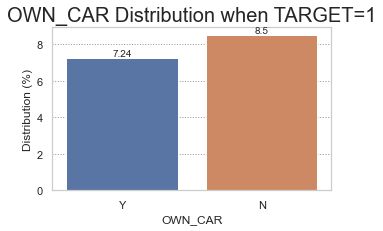

p-value is:  9.24587157104808e-34
chi=146.674225, critical value=3.841459
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


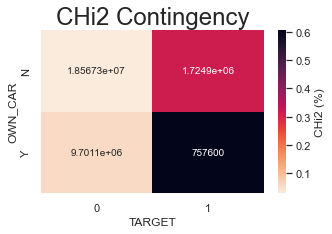

In [26]:
dfs['application_train'] = renameCol(dfs['application_train'], 'FLAG_OWN_CAR', 'OWN_CAR')
plotBalance(dfs['application_train'], ['OWN_CAR'])
plotBalance(dfs['application_train'], ['TARGET', 'OWN_CAR', 'SK_ID_CURR'], mask=1, heigth=3, width=5)
chi2(dfs['application_train'], 'OWN_CAR', 'TARGET', heigth=3, width=5)

#### Real Estate Ownership of Applicants

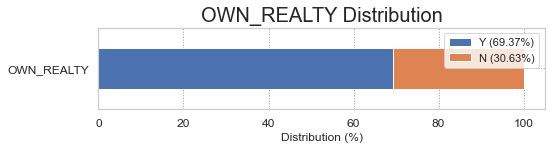

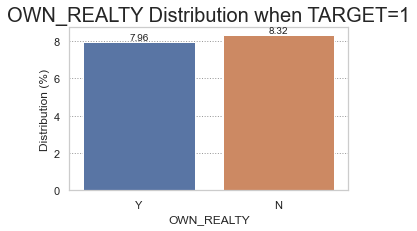

p-value is:  0.0006698984568802406
chi=11.570959, critical value=3.841459
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


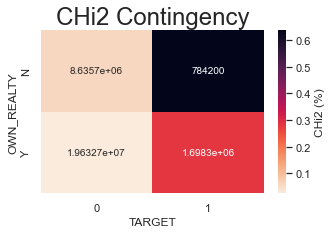

In [27]:
dfs['application_train'] = renameCol(dfs['application_train'], 'FLAG_OWN_REALTY', 'OWN_REALTY')
plotBalance(dfs['application_train'], ['OWN_REALTY'])
plotBalance(dfs['application_train'], ['TARGET', 'OWN_REALTY', 'SK_ID_CURR'], mask=1, heigth=3, width=5)
chi2(dfs['application_train'], 'OWN_REALTY', 'TARGET', heigth=3, width=5)

#### Applicants have Phone ?

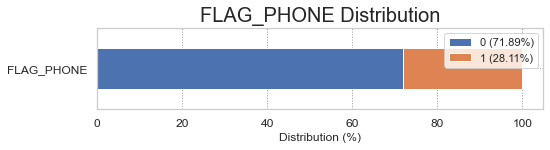

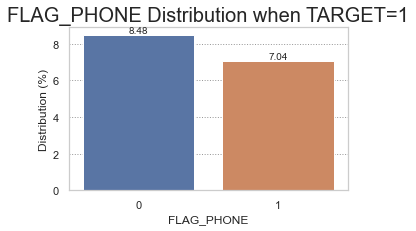

p-value is:  9.552130497205363e-40
chi=174.070905, critical value=3.841459
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


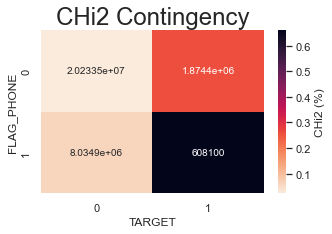

In [35]:
plotBalance(dfs['application_train'], ['FLAG_PHONE'])
plotBalance(dfs['application_train'], ['TARGET', 'FLAG_PHONE', 'SK_ID_CURR'], mask=1, heigth=3, width=5)
chi2(dfs['application_train'], 'FLAG_PHONE', 'TARGET', heigth=3, width=5)

#### Applicants have E-mail ?

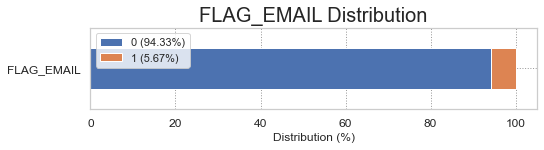

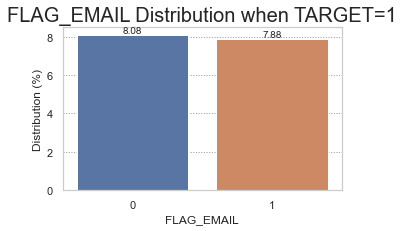

p-value is:  0.336532839107651
chi=0.923595, critical value=3.841459
At 0.05 level of significance, we accept the null hypotheses. 
    They are independent.


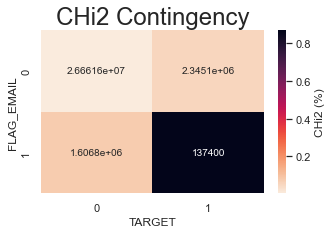

In [36]:
plotBalance(dfs['application_train'], ['FLAG_EMAIL'])
plotBalance(dfs['application_train'], ['TARGET', 'FLAG_EMAIL', 'SK_ID_CURR'], mask=1, heigth=3, width=5)
chi2(dfs['application_train'], 'FLAG_EMAIL', 'TARGET', heigth=3, width=5)

### Quantitative Variables

In [30]:
dfs['application_train'][colsOfType(dfs['application_train'])].describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307509.000000  307509.000000  307509.000000      3.075090e+05   
mean   278180.813121       0.080729       0.417054      1.687969e+05   
std    102790.219968       0.272419       0.722123      2.371234e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189146.000000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367143.000000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075090e+05  307497.000000     3.072330e+05   
mean   5.990258e+05   27108.545347     5.383962e+05   
std    4.024921e+05   14493.778987     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307509.000000  307509.000000  307509.000000   
mean                     0.020868  -16037.017291   63815.465479   
std                      0.013831    4363.994085  141276.130137   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1214.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307509.000000    307509.000000  104582.000000  307509.000000   
mean        -4986.136946     -2994.202140      12.061091       0.999997   
std          3522.891109      1509.450739      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7480.000000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307509.000000    307509.000000     307509.000000  307509.000000   
mean         0.819888         0.199367          0.998133       0.281065   
std          0.384281         0.399525          0.043164       0.449520   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307509.000000    307509.000000         307509.000000   
mean        0.056720         2.152665              2.052464   
std         0.231308         0.910682              0.509036   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307509.000000            307509.000000   
mean                      2.031521                12.063403   
std                       0.502739                 3.265837   
min                       1.000000                 0.000000   
25%                       

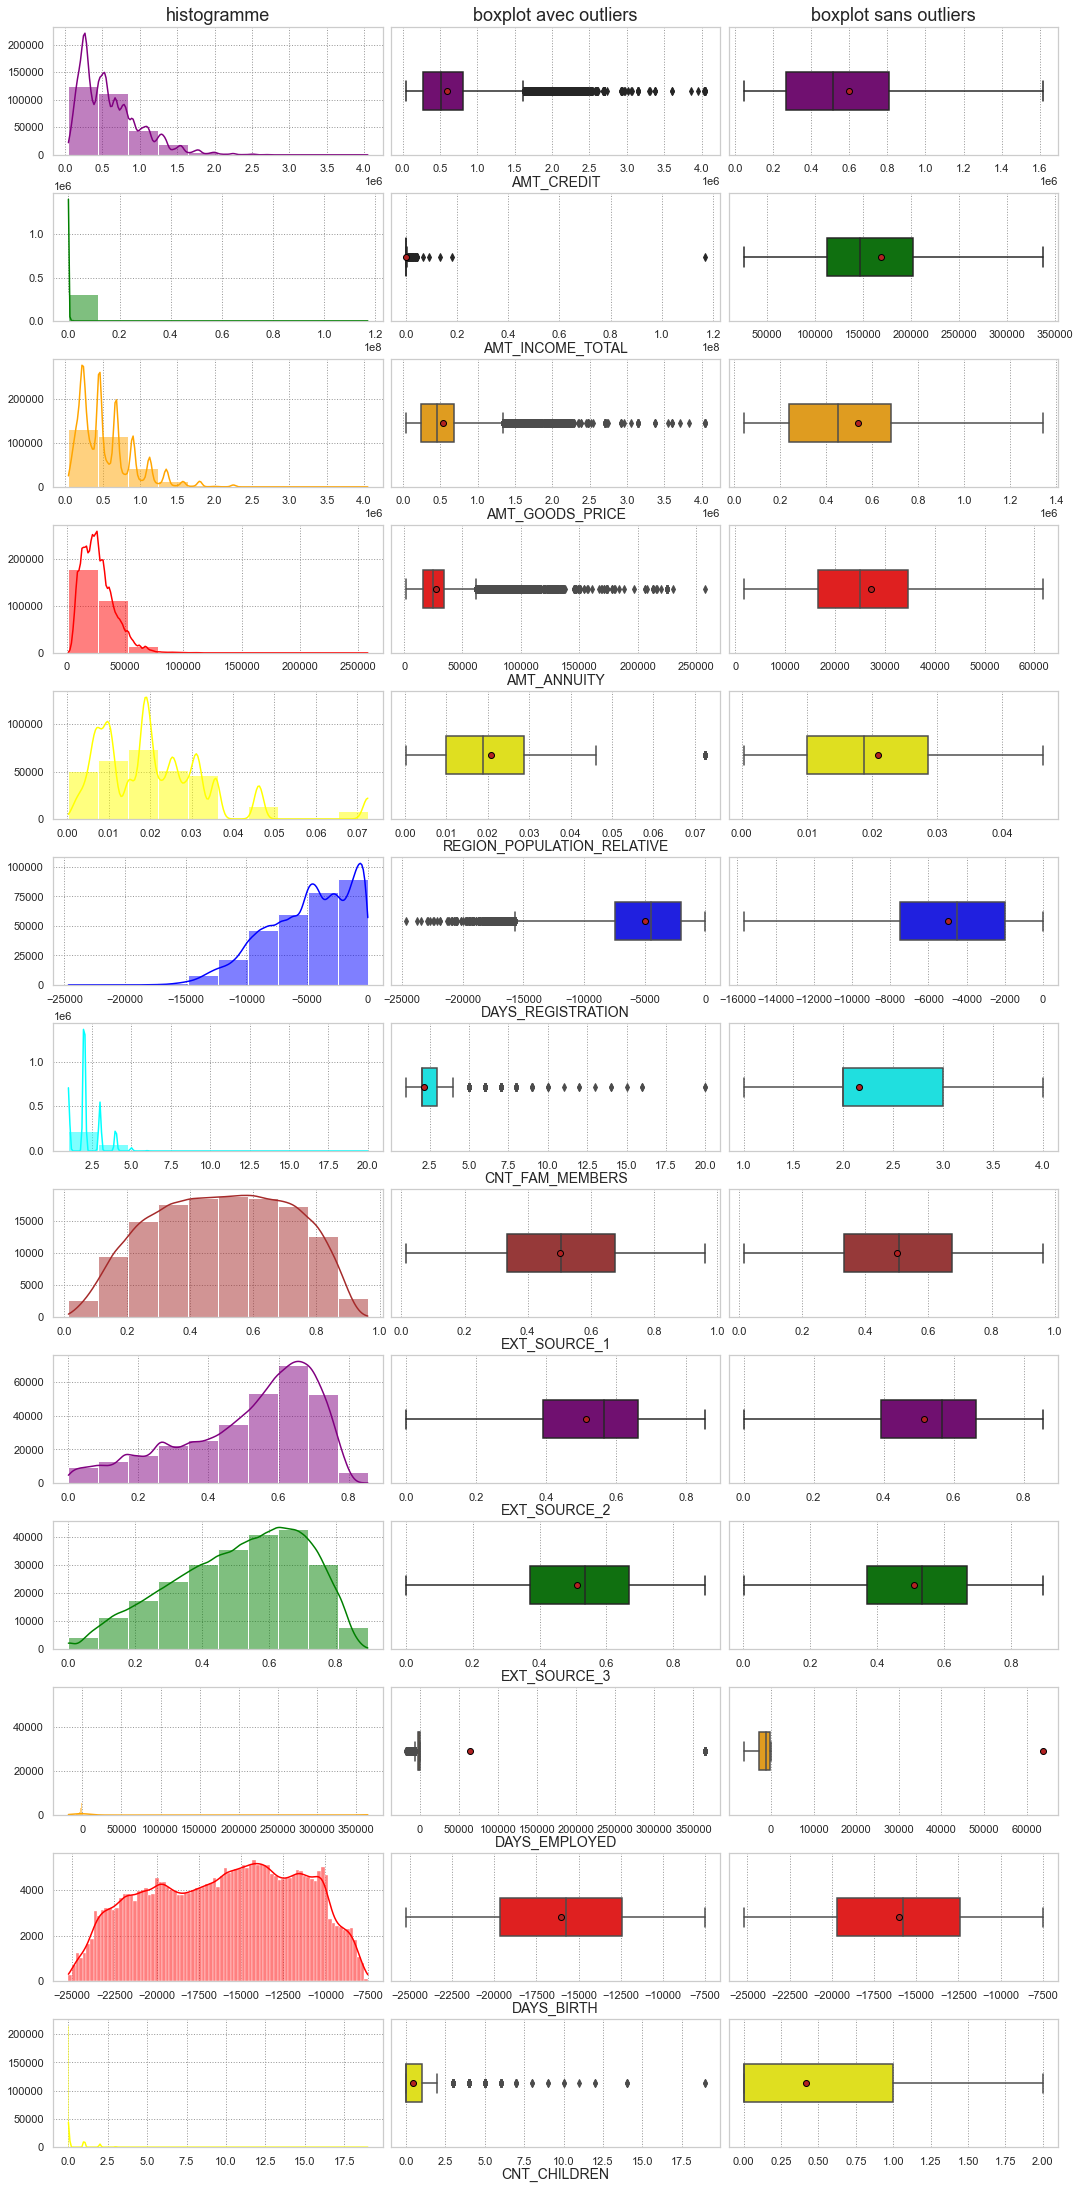

In [34]:
histo_distribution(dfs['application_train'][['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']])

#### <a id='5-2'>Amount Income Total</a>

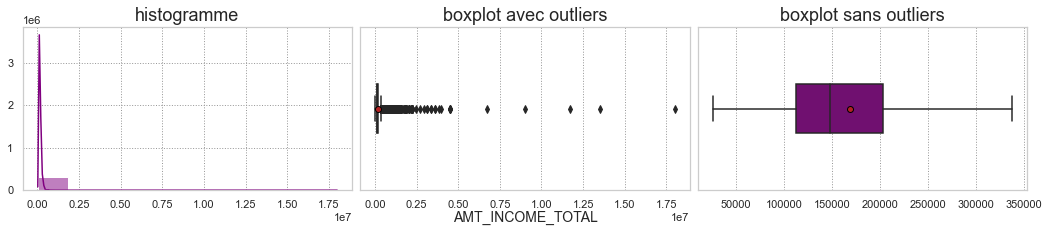

In [ ]:
histo_distribution(pd.DataFrame(dfs['application_train']['AMT_INCOME_TOTAL']))

In [ ]:
dfs['application_train']["AMT_INCOME_TOTAL"].dropna().describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
dfs['application_train'][dfs['application_train']["AMT_INCOME_TOTAL"]>1e+07]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840       114967       1         Cash loans           F            N   
203693      336147       0         Cash loans           M            Y   
246858      385674       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840                Y             1       117000000.0    562491.0   
203693               Y             2        18000090.0    675000.0   
246858               Y             0        13500000.0   1400503.5   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
12840       26194.5  ...                 0                0                0   
203693      69295.5  ...                 0                0                0   
246858     130945.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
12840                 0                        0.0                       0.0   
203693                0                        NaN                       NaN   
246858                0                        NaN                       NaN   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
12840                          0.0                        0.0   
203693                         NaN                        NaN   
246858                         NaN                        NaN   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
12840                         0.0                         1.0  
203693                        NaN                         NaN  
246858                        NaN                         NaN  

[3 rows x 122 columns]

In [ ]:
dfs['application_train'].loc[dfs['application_train']['AMT_INCOME_TOTAL']==dfs['application_train']['AMT_INCOME_TOTAL'].max(), 'AMT_INCOME_TOTAL'] = dfs['application_train']['AMT_INCOME_TOTAL'].max()/10
dfs['application_train'][dfs['application_train']['AMT_INCOME_TOTAL']==dfs['application_train']['AMT_INCOME_TOTAL'].max()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
203693      336147       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
203693               Y             2        18000090.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
203693      69295.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
203693                0                        NaN                       NaN   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
203693                         NaN                        NaN   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
203693                        NaN                         NaN  

[1 rows x 122 columns]

In [ ]:
dfs['application_train'][dfs['application_train']["AMT_INCOME_TOTAL"]>1e+07]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840       114967       1         Cash loans           F            N   
203693      336147       0         Cash loans           M            Y   
246858      385674       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840                Y             1        11700000.0    562491.0   
203693               Y             2        18000090.0    675000.0   
246858               Y             0        13500000.0   1400503.5   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
12840       26194.5  ...                 0                0                0   
203693      69295.5  ...                 0                0                0   
246858     130945.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
12840                 0                        0.0                       0.0   
203693                0                        NaN                       NaN   
246858                0                        NaN                       NaN   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
12840                          0.0                        0.0   
203693                         NaN                        NaN   
246858                         NaN                        NaN   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
12840                         0.0                         1.0  
203693                        NaN                         NaN  
246858                        NaN                         NaN  

[3 rows x 122 columns]

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(np.log(dfs['application_train']["AMT_INCOME_TOTAL"]).dropna())

#### <a id='5-2'>Days Employed</a>

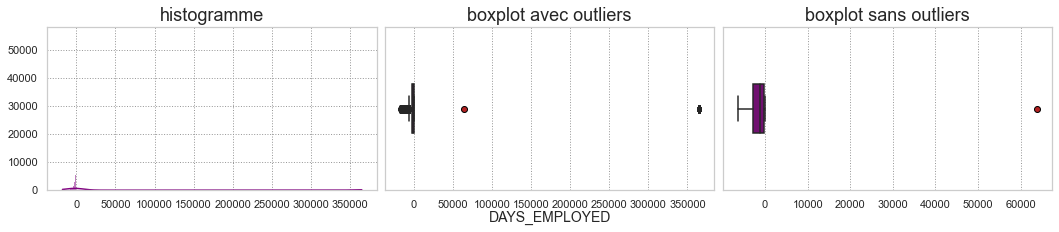

In [ ]:
histo_distribution(pd.DataFrame(dfs['application_train']['DAYS_EMPLOYED']))

In [ ]:
dfs['application_train']["DAYS_EMPLOYED"].dropna().describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
dfs['application_train'][dfs['application_train']['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [ ]:
dfs['application_train'].loc[dfs['application_train']['DAYS_EMPLOYED'] > 0,'DAYS_EMPLOYED']=np.nan

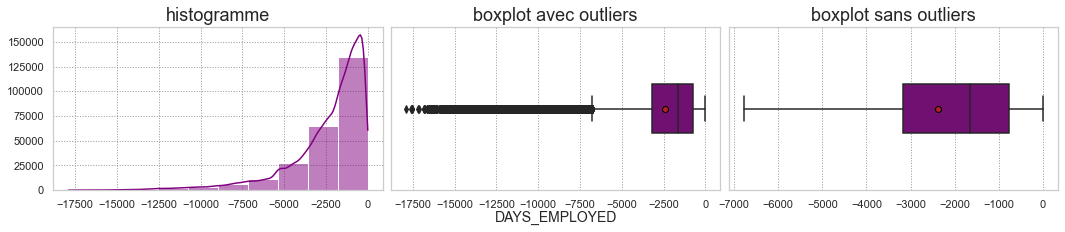

In [ ]:
histo_distribution(pd.DataFrame(dfs['application_train']['DAYS_EMPLOYED']))

In [ ]:
dfs['application_train']["DAYS_EMPLOYED"].dropna().describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

## Correlations

## ANOVA

## <a id='5-15'>Previous Application Data</a>

### Client Type

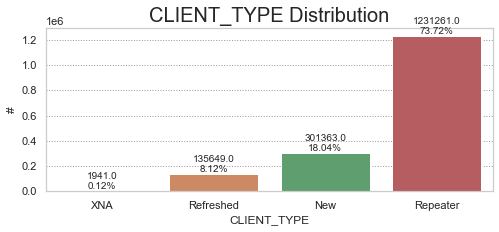

In [37]:
dfs['previous_application'] = renameCol(dfs['previous_application'], 'NAME_CLIENT_TYPE', 'CLIENT_TYPE')
barplotDistribution(dfs['previous_application']['CLIENT_TYPE'], heigth=3, width=8, percent=True)

### Contract Status

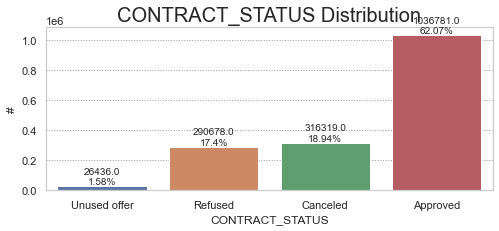

In [16]:
dfs['previous_application'] = renameCol(dfs['previous_application'], 'NAME_CONTRACT_STATUS', 'CONTRACT_STATUS')
barplotDistribution(dfs['previous_application']['CONTRACT_STATUS'], heigth=3, width=8, percent=True)

### <a id='5-15-1'> Contract product type</a>

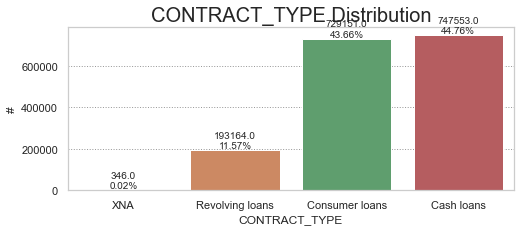

In [19]:
dfs['previous_application'] = renameCol(dfs['previous_application'], 'NAME_CONTRACT_TYPE', 'CONTRACT_TYPE')
barplotDistribution(dfs['previous_application']['CONTRACT_TYPE'], heigth=3, width=8, percent=True)

### <a id='5-15-6'> Why was the previous application rejected ?</a>

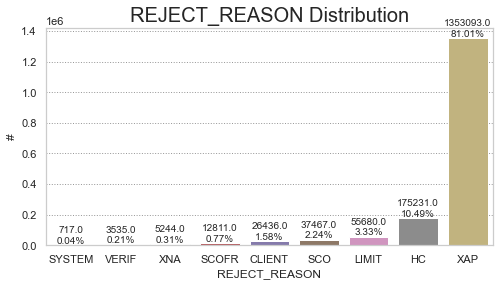

In [21]:
dfs['previous_application'] = renameCol(dfs['previous_application'], 'CODE_REJECT_REASON', 'REJECT_REASON')
barplotDistribution(dfs['previous_application']['REJECT_REASON'], heigth=4, width=8, percent=True)

### On which day of the week did the clients apply for previous application

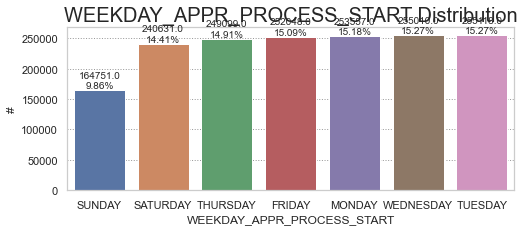

In [24]:
barplotDistribution(dfs['previous_application']['WEEKDAY_APPR_PROCESS_START'], heigth=3, width=8, percent=True)

### Purpose of Cash Loan

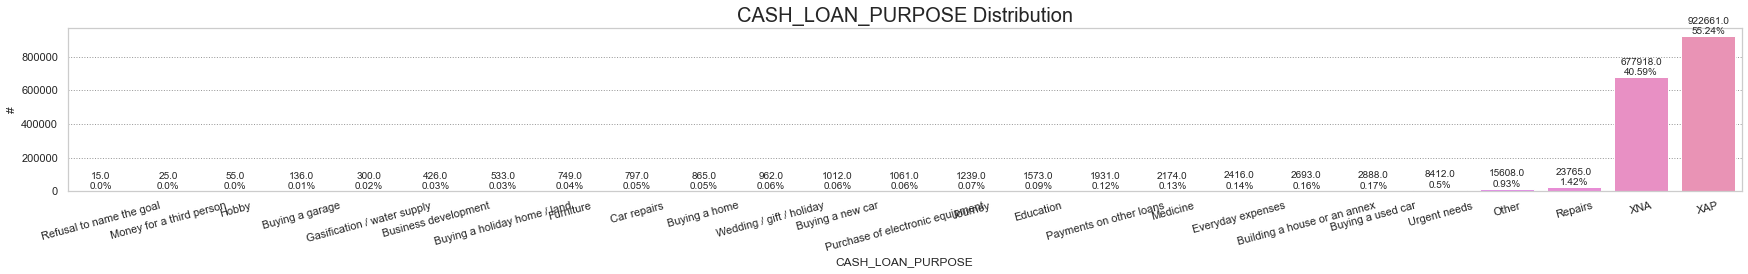

In [28]:
dfs['previous_application'] = renameCol(dfs['previous_application'], 'NAME_CASH_LOAN_PURPOSE', 'CASH_LOAN_PURPOSE')
barplotDistribution(dfs['previous_application']['CASH_LOAN_PURPOSE'], heigth=3, width=30, percent=True, rotation=15)

### Payment method

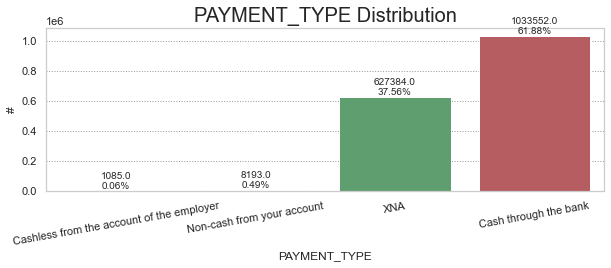

In [32]:
dfs['previous_application'] = renameCol(dfs['previous_application'], 'NAME_PAYMENT_TYPE', 'PAYMENT_TYPE')
barplotDistribution(dfs['previous_application']['PAYMENT_TYPE'], heigth=3, percent=True, rotation=10)

### Who accompanied the clients when applying for the previous application

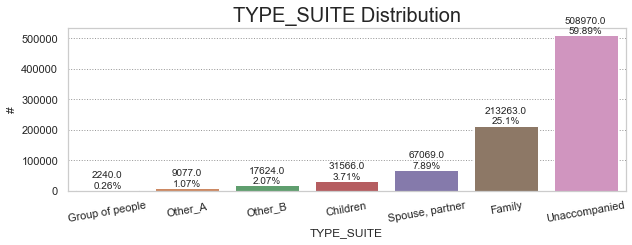

In [34]:
dfs['previous_application'] = renameCol(dfs['previous_application'], 'NAME_TYPE_SUITE', 'TYPE_SUITE')
barplotDistribution(dfs['previous_application']['TYPE_SUITE'], heigth=3, percent=True, rotation=10)

### What kind of goods did the clients apply for in the previous application

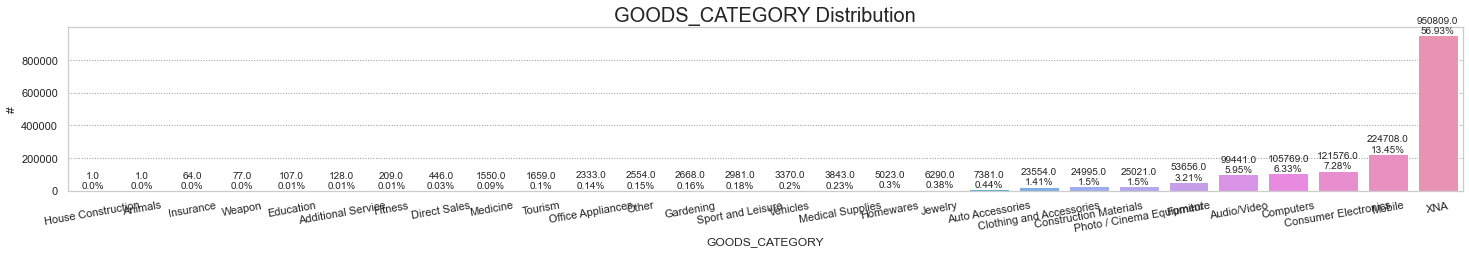

In [40]:
dfs['previous_application'] = renameCol(dfs['previous_application'], 'NAME_GOODS_CATEGORY', 'GOODS_CATEGORY')
barplotDistribution(dfs['previous_application']['GOODS_CATEGORY'], heigth=3, width=25, percent=True, rotation=10)

### Was the previous application for CASH, POS, CAR, …

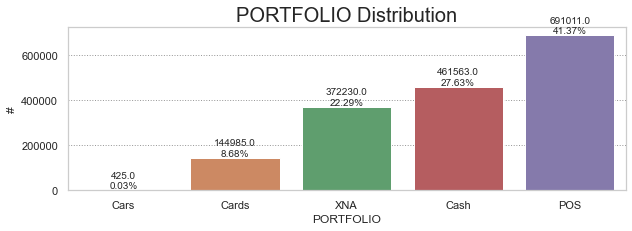

In [42]:
dfs['previous_application'] = renameCol(dfs['previous_application'], 'NAME_PORTFOLIO', 'PORTFOLIO')
barplotDistribution(dfs['previous_application']['PORTFOLIO'], heigth=3, percent=True)

### Top channels through which they acquired the clients on the previous application

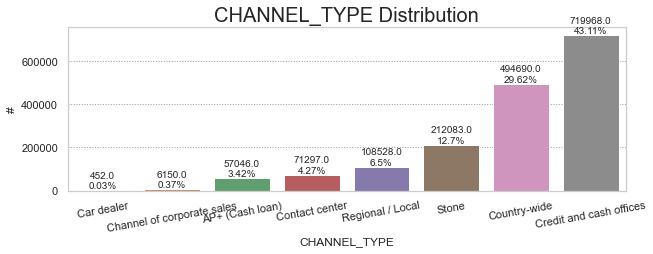

In [44]:
barplotDistribution(dfs['previous_application']['CHANNEL_TYPE'], heigth=3, percent=True, rotation=10)

### Top industry of the seller

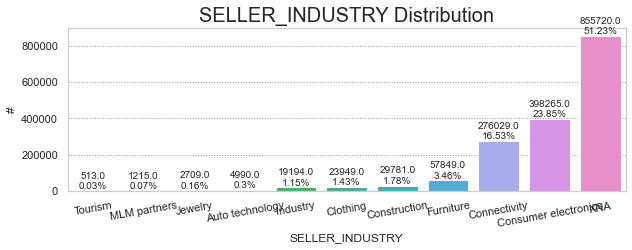

In [46]:
dfs['previous_application'] = renameCol(dfs['previous_application'], 'NAME_SELLER_INDUSTRY', 'SELLER_INDUSTRY')
barplotDistribution(dfs['previous_application']['SELLER_INDUSTRY'], heigth=3, percent=True, rotation=10)

### Grouped interest rate into small medium and high of the previous application

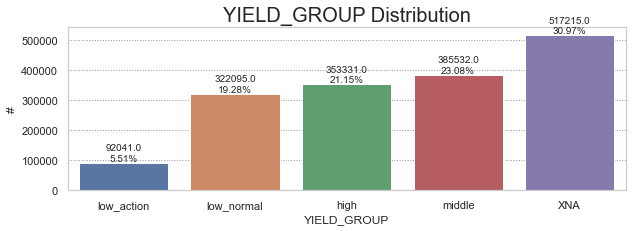

In [48]:
dfs['previous_application'] = renameCol(dfs['previous_application'], 'NAME_YIELD_GROUP', 'YIELD_GROUP')
barplotDistribution(dfs['previous_application']['YIELD_GROUP'], heigth=3, percent=True)

### Did the clients requested insurance during the previous application?

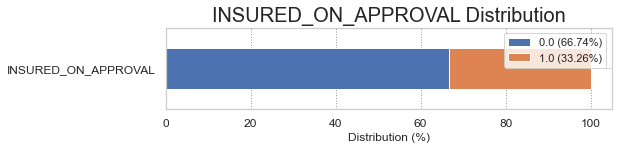

In [49]:
dfs['previous_application'] = renameCol(dfs['previous_application'], 'NFLAG_INSURED_ON_APPROVAL', 'INSURED_ON_APPROVAL')
plotBalance(dfs['previous_application'], ['INSURED_ON_APPROVAL'])

## Data Merge & Aggregation

In [ ]:
# run functions and pre_settings
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

def group(df_to_agg, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
    agg_df = df_to_agg.groupby(aggregate_by).agg(aggregations)
    agg_df.columns = pd.Index(['{}{}_{}'.format(prefix, e[0], e[1].upper())
                               for e in agg_df.columns.tolist()])
    return agg_df.reset_index()

def group_and_merge(df_to_agg, df_to_merge, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
    agg_df = group(df_to_agg, prefix, aggregations, aggregate_by= aggregate_by)
    return df_to_merge.merge(agg_df, how='left', on= aggregate_by)

def do_sum(dataframe, group_cols, counted, agg_name):
    gp = dataframe[group_cols + [counted]].groupby(group_cols)[counted].sum().reset_index().rename(columns={counted: agg_name})
    dataframe = dataframe.merge(gp, on=group_cols, how='left')
    return dataframe

def reduce_mem_usage(dataframe):
    m_start = dataframe.memory_usage().sum() / 1024 ** 2
    for col in dataframe.columns:
        col_type = dataframe[col].dtype
        if col_type != object:
            c_min = dataframe[col].min()
            c_max = dataframe[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    dataframe[col] = dataframe[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    dataframe[col] = dataframe[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    dataframe[col] = dataframe[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    dataframe[col] = dataframe[col].astype(np.int64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    dataframe[col] = dataframe[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    dataframe[col] = dataframe[col].astype(np.float32)
                else:
                    dataframe[col] = dataframe[col].astype(np.float64)

    m_end = dataframe.memory_usage().sum() / 1024 ** 2
    return dataframe

nan_as_category = True


def risk_groupanizer(dataframe, column_names, target_val=1, upper_limit_ratio=8.2, lower_limit_ratio=8.2):
    # one-hot encoder killer :-)
    all_cols = dataframe.columns
    for col in column_names:

        temp_df = dataframe.groupby([col] + ['TARGET'])[['SK_ID_CURR']].count().reset_index()
        temp_df['ratio%'] = round(temp_df['SK_ID_CURR']*100/temp_df.groupby([col])['SK_ID_CURR'].transform('sum'), 1)
        col_groups_high_risk = temp_df[(temp_df['TARGET'] == target_val) &
                                       (temp_df['ratio%'] >= upper_limit_ratio)][col].tolist()
        col_groups_low_risk = temp_df[(temp_df['TARGET'] == target_val) &
                                      (lower_limit_ratio >= temp_df['ratio%'])][col].tolist()
        if upper_limit_ratio != lower_limit_ratio:
            col_groups_medium_risk = temp_df[(temp_df['TARGET'] == target_val) &
                (upper_limit_ratio > temp_df['ratio%']) & (temp_df['ratio%'] > lower_limit_ratio)][col].tolist()

            for risk, col_groups in zip(['_high_risk', '_medium_risk', '_low_risk'],
                                        [col_groups_high_risk, col_groups_medium_risk, col_groups_low_risk]):
                dataframe[col + risk] = [1 if val in col_groups else 0 for val in dataframe[col].values]
        else:
            for risk, col_groups in zip(['_high_risk', '_low_risk'], [col_groups_high_risk, col_groups_low_risk]):
                dataframe[col + risk] = [1 if val in col_groups else 0 for val in dataframe[col].values]
        if dataframe[col].dtype == 'O' or dataframe[col].dtype == 'object':
            dataframe.drop(col, axis=1, inplace=True)
    return dataframe, list(set(dataframe.columns).difference(set(all_cols)))


In [ ]:
def application():
    df = dfs['application_train']

    # general cleaning procedures
    # df = df[df['CODE_GENDER'] != 'XNA']
    # df = df[df['AMT_INCOME_TOTAL'] < 20000000] # remove a outlier 117M
    # # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    # df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True) # set null value
    df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True) # set null value

    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['GENDER', 'OWN_CAR', 'OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)

    # Flag_document features - count and kurtosis
    docs = [f for f in df.columns if 'FLAG_DOC' in f]
    df['DOCUMENT_COUNT'] = df[docs].sum(axis=1)
    df['NEW_DOC_KURT'] = df[docs].kurtosis(axis=1)

    def get_age_label(days_birth):
        """ Return the age group label (int). """
        age_years = -days_birth / 365
        if age_years < 27: return 1
        elif age_years < 40: return 2
        elif age_years < 50: return 3
        elif age_years < 65: return 4
        elif age_years < 99: return 5
        else: return 0
    # Categorical age - based on target=1 plot
    df['AGE_RANGE'] = df['DAYS_BIRTH'].apply(lambda x: get_age_label(x))

    # New features based on External sources
    df['EXT_SOURCES_PROD'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
    np.warnings.filterwarnings('ignore', r'All-NaN (slice|axis) encountered')
    for function_name in ['min', 'max', 'mean', 'nanmedian', 'var']:
        feature_name = 'EXT_SOURCES_{}'.format(function_name.upper())
        df[feature_name] = eval('np.{}'.format(function_name))(
            df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1)

    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

    # Credit ratios
    df['CREDIT_TO_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
    
    # Income ratios
    df['INCOME_TO_EMPLOYED_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_EMPLOYED']
    df['INCOME_TO_BIRTH_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_BIRTH']
    
    # Time ratios
    df['ID_TO_BIRTH_RATIO'] = df['DAYS_ID_PUBLISH'] / df['DAYS_BIRTH']
    df['CAR_TO_BIRTH_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_BIRTH']
    df['CAR_TO_EMPLOYED_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_EMPLOYED']
    df['PHONE_TO_BIRTH_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']

    # EXT_SOURCE_X FEATURE
    df['APPS_EXT_SOURCE_MEAN'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    df['APPS_EXT_SOURCE_STD'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    df['APPS_EXT_SOURCE_STD'] = df['APPS_EXT_SOURCE_STD'].fillna(df['APPS_EXT_SOURCE_STD'].mean())
    df['APP_SCORE1_TO_BIRTH_RATIO'] = df['EXT_SOURCE_1'] / (df['DAYS_BIRTH'] / 365.25)
    df['APP_SCORE2_TO_BIRTH_RATIO'] = df['EXT_SOURCE_2'] / (df['DAYS_BIRTH'] / 365.25)
    df['APP_SCORE3_TO_BIRTH_RATIO'] = df['EXT_SOURCE_3'] / (df['DAYS_BIRTH'] / 365.25)
    df['APP_SCORE1_TO_EMPLOY_RATIO'] = df['EXT_SOURCE_1'] / (df['DAYS_EMPLOYED'] / 365.25)
    df['APP_EXT_SOURCE_2*EXT_SOURCE_3*DAYS_BIRTH'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] * df['DAYS_BIRTH']
    df['APP_SCORE1_TO_FAM_CNT_RATIO'] = df['EXT_SOURCE_1'] / df['CNT_FAM_MEMBERS']
    df['APP_SCORE1_TO_GOODS_RATIO'] = df['EXT_SOURCE_1'] / df['AMT_GOODS_PRICE']
    df['APP_SCORE1_TO_CREDIT_RATIO'] = df['EXT_SOURCE_1'] / df['AMT_CREDIT']
    df['APP_SCORE1_TO_SCORE2_RATIO'] = df['EXT_SOURCE_1'] / df['EXT_SOURCE_2']
    df['APP_SCORE1_TO_SCORE3_RATIO'] = df['EXT_SOURCE_1'] / df['EXT_SOURCE_3']
    df['APP_SCORE2_TO_CREDIT_RATIO'] = df['EXT_SOURCE_2'] / df['AMT_CREDIT']
    df['APP_SCORE2_TO_REGION_RATING_RATIO'] = df['EXT_SOURCE_2'] / df['REGION_RATING_CLIENT']
    df['APP_SCORE2_TO_CITY_RATING_RATIO'] = df['EXT_SOURCE_2'] / df['REGION_RATING_CLIENT_W_CITY']
    df['APP_SCORE2_TO_POP_RATIO'] = df['EXT_SOURCE_2'] / df['REGION_POPULATION_RELATIVE']
    df['APP_SCORE2_TO_PHONE_CHANGE_RATIO'] = df['EXT_SOURCE_2'] / df['DAYS_LAST_PHONE_CHANGE']
    df['APP_EXT_SOURCE_1*EXT_SOURCE_2'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2']
    df['APP_EXT_SOURCE_1*EXT_SOURCE_3'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_3']
    df['APP_EXT_SOURCE_2*EXT_SOURCE_3'] = df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
    df['APP_EXT_SOURCE_1*DAYS_EMPLOYED'] = df['EXT_SOURCE_1'] * df['DAYS_EMPLOYED']
    df['APP_EXT_SOURCE_2*DAYS_EMPLOYED'] = df['EXT_SOURCE_2'] * df['DAYS_EMPLOYED']
    df['APP_EXT_SOURCE_3*DAYS_EMPLOYED'] = df['EXT_SOURCE_3'] * df['DAYS_EMPLOYED']

    # AMT_INCOME_TOTAL : income
    # CNT_FAM_MEMBERS  : the number of family members
    df['APPS_GOODS_INCOME_RATIO'] = df['AMT_GOODS_PRICE'] / df['AMT_INCOME_TOTAL']
    df['APPS_CNT_FAM_INCOME_RATIO'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    
    # DAYS_BIRTH : Client's age in days at the time of application
    # DAYS_EMPLOYED : How many days before the application the person started current employment
    df['APPS_INCOME_EMPLOYED_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_EMPLOYED']

    # other feature from better than 0.8
    df['CREDIT_TO_GOODS_RATIO_2'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
    df['APP_AMT_INCOME_TOTAL_12_AMT_ANNUITY_ratio'] = df['AMT_INCOME_TOTAL'] / 12. - df['AMT_ANNUITY']
    df['APP_INCOME_TO_EMPLOYED_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_EMPLOYED']
    df['APP_DAYS_LAST_PHONE_CHANGE_DAYS_EMPLOYED_ratio'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_EMPLOYED']
    df['APP_DAYS_EMPLOYED_DAYS_BIRTH_diff'] = df['DAYS_EMPLOYED'] - df['DAYS_BIRTH']

    print('"Application_Train" final shape:', df.shape)
    return df

In [ ]:
def bureau_bb():
    bureau = dfs['bureau']
    bb = dfs['bureau_balance']

    # Credit duration and credit/account end date difference
    bureau['CREDIT_DURATION'] = -bureau['DAYS_CREDIT'] + bureau['DAYS_CREDIT_ENDDATE']
    bureau['ENDDATE_DIF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
    
    # Credit to debt ratio and difference
    bureau['DEBT_PERCENTAGE'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_CREDIT_SUM_DEBT']
    bureau['DEBT_CREDIT_DIFF'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']
    bureau['CREDIT_TO_ANNUITY_RATIO'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_ANNUITY']
    bureau['BUREAU_CREDIT_FACT_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_ENDDATE_FACT']
    bureau['BUREAU_CREDIT_ENDDATE_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_CREDIT_ENDDATE']
    bureau['BUREAU_CREDIT_DEBT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['AMT_CREDIT_SUM']

    # CREDIT_DAY_OVERDUE :
    bureau['BUREAU_IS_DPD'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 0 else 0)
    bureau['BUREAU_IS_DPD_OVER120'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 120 else 0)

    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)

    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size', 'mean']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']

    #Status of Credit Bureau loan during the month
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')

    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean', 'min'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean', 'max'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean', 'max', 'sum'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean', 'sum'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum'],
        'SK_ID_BUREAU': ['count'],
        'DAYS_ENDDATE_FACT': ['min', 'max', 'mean'],
        'ENDDATE_DIF': ['min', 'max', 'mean'],
        'BUREAU_CREDIT_FACT_DIFF': ['min', 'max', 'mean'],
        'BUREAU_CREDIT_ENDDATE_DIFF': ['min', 'max', 'mean'],
        'BUREAU_CREDIT_DEBT_RATIO': ['min', 'max', 'mean'],
        'DEBT_CREDIT_DIFF': ['min', 'max', 'mean'],
        'BUREAU_IS_DPD': ['mean', 'sum'],
        'BUREAU_IS_DPD_OVER120': ['mean', 'sum']
        }

    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])

    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')

    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')

    print('"Bureau/Bureau Balance" final shape:', bureau_agg.shape)
    return bureau_agg

In [ ]:
def previous_application():
    prev = dfs['previous_application']

    prev, cat_cols = one_hot_encoder(prev, nan_as_category=True)

    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']

    # Feature engineering: ratios and difference
    prev['APPLICATION_CREDIT_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_CREDIT']
    prev['CREDIT_TO_ANNUITY_RATIO'] = prev['AMT_CREDIT'] / prev['AMT_ANNUITY']
    prev['DOWN_PAYMENT_TO_CREDIT'] = prev['AMT_DOWN_PAYMENT'] / prev['AMT_CREDIT']

    # Interest ratio on previous application (simplified)
    total_payment = prev['AMT_ANNUITY'] * prev['CNT_PAYMENT']
    prev['SIMPLE_INTERESTS'] = (total_payment / prev['AMT_CREDIT'] - 1) / prev['CNT_PAYMENT']

    # Days last due difference (scheduled x done)
    prev['DAYS_LAST_DUE_DIFF'] = prev['DAYS_LAST_DUE_1ST_VERSION'] - prev['DAYS_LAST_DUE']

    # from off
    prev['PREV_GOODS_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_GOODS_PRICE']
    prev['PREV_ANNUITY_APPL_RATIO'] = prev['AMT_ANNUITY']/prev['AMT_APPLICATION']
    prev['PREV_GOODS_APPL_RATIO'] = prev['AMT_GOODS_PRICE'] / prev['AMT_APPLICATION']

    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean', 'sum'],
        'AMT_APPLICATION': ['min', 'max', 'mean', 'sum'],
        'AMT_CREDIT': ['min', 'max', 'mean', 'sum'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean', 'sum'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
        'SK_ID_PREV': ['nunique'],
        'DAYS_TERMINATION': ['max'],
        'CREDIT_TO_ANNUITY_RATIO': ['mean', 'max'],
        'APPLICATION_CREDIT_DIFF': ['min', 'max', 'mean', 'sum'],
        'DOWN_PAYMENT_TO_CREDIT': ['mean'],
        'PREV_GOODS_DIFF': ['mean', 'max', 'sum'],
        'PREV_GOODS_APPL_RATIO': ['mean', 'max'],
        'DAYS_LAST_DUE_DIFF': ['mean', 'max', 'sum'],
        'SIMPLE_INTERESTS': ['mean', 'max']
    }

    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']

    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])

    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')

    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')

    print('"Previous Applications" final shape:', prev_agg.shape)
    return prev_agg

In [ ]:
def pos_cash():
    pos = dfs['POS_CASH_balance']

    pos, cat_cols = one_hot_encoder(pos, nan_as_category=True)

    # Flag months with late payment
    pos['LATE_PAYMENT'] = pos['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    pos['POS_IS_DPD'] = pos['SK_DPD'].apply(lambda x: 1 if x > 0 else 0) # <-- same with ['LATE_PAYMENT']
    pos['POS_IS_DPD_UNDER_120'] = pos['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    pos['POS_IS_DPD_OVER_120'] = pos['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size', 'min'],
        'SK_DPD': ['max', 'mean', 'sum', 'var', 'min'],
        'SK_DPD_DEF': ['max', 'mean', 'sum'],
        'SK_ID_PREV': ['nunique'],
        'LATE_PAYMENT': ['mean'],
        'SK_ID_CURR': ['count'],
        'CNT_INSTALMENT': ['min', 'max', 'mean', 'sum'],
        'CNT_INSTALMENT_FUTURE': ['min', 'max', 'mean', 'sum'],
        'POS_IS_DPD': ['mean', 'sum'],
        'POS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'POS_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    for cat in cat_cols:
        aggregations[cat] = ['mean']

    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])

    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()


    sort_pos = pos.sort_values(by=['SK_ID_PREV', 'MONTHS_BALANCE'])
    gp = sort_pos.groupby('SK_ID_PREV')
    df_pos = pd.DataFrame()
    df_pos['SK_ID_CURR'] = gp['SK_ID_CURR'].first()
    df_pos['MONTHS_BALANCE_MAX'] = gp['MONTHS_BALANCE'].max()

    # Percentage of previous loans completed and completed before initial term
    df_pos['POS_LOAN_COMPLETED_MEAN'] = gp['NAME_CONTRACT_STATUS_Completed'].mean()
    df_pos['POS_COMPLETED_BEFORE_MEAN'] = gp['CNT_INSTALMENT'].first() - gp['CNT_INSTALMENT'].last()
    df_pos['POS_COMPLETED_BEFORE_MEAN'] = df_pos.apply(lambda x: 1 if x['POS_COMPLETED_BEFORE_MEAN'] > 0 \
                                                                      and x['POS_LOAN_COMPLETED_MEAN'] > 0 else 0, axis=1)
    # Number of remaining installments (future installments) and percentage from total
    df_pos['POS_REMAINING_INSTALMENTS'] = gp['CNT_INSTALMENT_FUTURE'].last()
    df_pos['POS_REMAINING_INSTALMENTS_RATIO'] = gp['CNT_INSTALMENT_FUTURE'].last()/gp['CNT_INSTALMENT'].last()

    # Group by SK_ID_CURR and merge
    df_gp = df_pos.groupby('SK_ID_CURR').sum().reset_index()
    df_gp.drop(['MONTHS_BALANCE_MAX'], axis=1, inplace= True)
    pos_agg = pd.merge(pos_agg, df_gp, on= 'SK_ID_CURR', how= 'left')

    # Percentage of late payments for the 3 most recent applications
    pos = do_sum(pos, ['SK_ID_PREV'], 'LATE_PAYMENT', 'LATE_PAYMENT_SUM')

    # Last month of each application
    last_month_df = pos.groupby('SK_ID_PREV')['MONTHS_BALANCE'].idxmax()

    # Most recent applications (last 3)
    sort_pos = pos.sort_values(by=['SK_ID_PREV', 'MONTHS_BALANCE'])
    gp = sort_pos.iloc[last_month_df].groupby('SK_ID_CURR').tail(3)
    gp_mean = gp.groupby('SK_ID_CURR').mean().reset_index()
    pos_agg = pd.merge(pos_agg, gp_mean[['SK_ID_CURR', 'LATE_PAYMENT_SUM']], on='SK_ID_CURR', how='left')

    print('"Pos-Cash" balance final shape:', pos_agg.shape) 
    return pos_agg

In [ ]:
def installment():
    ins = dfs['installments_payments']

    ins, cat_cols = one_hot_encoder(ins, nan_as_category=True)

    # Group payments and get Payment difference
    ins = do_sum(ins, ['SK_ID_PREV', 'NUM_INSTALMENT_NUMBER'], 'AMT_PAYMENT', 'AMT_PAYMENT_GROUPED')
    ins['PAYMENT_DIFFERENCE'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT_GROUPED']
    ins['PAYMENT_RATIO'] = ins['AMT_INSTALMENT'] / ins['AMT_PAYMENT_GROUPED']
    ins['PAID_OVER_AMOUNT'] = ins['AMT_PAYMENT'] - ins['AMT_INSTALMENT']
    ins['PAID_OVER'] = (ins['PAID_OVER_AMOUNT'] > 0).astype(int)

    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']

    # Days past due and days before due (no negative values)
    ins['DPD_diff'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD_diff'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD_diff'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD_diff'].apply(lambda x: x if x > 0 else 0)

    # Flag late payment
    ins['LATE_PAYMENT'] = ins['DBD'].apply(lambda x: 1 if x > 0 else 0)
    ins['INSTALMENT_PAYMENT_RATIO'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['LATE_PAYMENT_RATIO'] = ins.apply(lambda x: x['INSTALMENT_PAYMENT_RATIO'] if x['LATE_PAYMENT'] == 1 else 0, axis=1)

    # Flag late payments that have a significant amount
    ins['SIGNIFICANT_LATE_PAYMENT'] = ins['LATE_PAYMENT_RATIO'].apply(lambda x: 1 if x > 0.05 else 0)
    
    # Flag k threshold late payments
    ins['DPD_7'] = ins['DPD'].apply(lambda x: 1 if x >= 7 else 0)
    ins['DPD_15'] = ins['DPD'].apply(lambda x: 1 if x >= 15 else 0)

    ins['INS_IS_DPD_UNDER_120'] = ins['DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    ins['INS_IS_DPD_OVER_120'] = ins['DPD'].apply(lambda x: 1 if (x >= 120) else 0)

    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum', 'var'],
        'DBD': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum', 'min'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum', 'min'],
        'SK_ID_PREV': ['size', 'nunique'],
        'PAYMENT_DIFFERENCE': ['mean'],
        'PAYMENT_RATIO': ['mean', 'max'],
        'LATE_PAYMENT': ['mean', 'sum'],
        'SIGNIFICANT_LATE_PAYMENT': ['mean', 'sum'],
        'LATE_PAYMENT_RATIO': ['mean'],
        'DPD_7': ['mean'],
        'DPD_15': ['mean'],
        'PAID_OVER': ['mean'],
        'DPD_diff':['mean', 'min', 'max'],
        'DBD_diff':['mean', 'min', 'max'],
        'DAYS_INSTALMENT': ['mean', 'max', 'sum'],
        'INS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'INS_IS_DPD_OVER_120': ['mean', 'sum']
    }

    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])

    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()

    # from oof (DAYS_ENTRY_PAYMENT)
    cond_day = ins['DAYS_ENTRY_PAYMENT'] >= -365
    ins_d365_grp = ins[cond_day].groupby('SK_ID_CURR')
    ins_d365_agg_dict = {
        'SK_ID_CURR': ['count'],
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DAYS_ENTRY_PAYMENT': ['mean', 'max', 'sum'],
        'DAYS_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_PAYMENT': ['mean', 'max', 'sum'],
        'PAYMENT_DIFF': ['mean', 'min', 'max', 'sum'],
        'PAYMENT_PERC': ['mean', 'max'],
        'DPD_diff': ['mean', 'min', 'max'],
        'DPD': ['mean', 'sum'],
        'INS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'INS_IS_DPD_OVER_120': ['mean', 'sum']}

    ins_d365_agg = ins_d365_grp.agg(ins_d365_agg_dict)
    ins_d365_agg.columns = ['INS_D365' + ('_').join(column).upper() for column in ins_d365_agg.columns.ravel()]

    ins_agg = ins_agg.merge(ins_d365_agg, on='SK_ID_CURR', how='left')

    print('"Installments Payments" final shape:', ins_agg.shape)
    return ins_agg

In [ ]:
def credit_card():    
    cc = dfs['credit_card_balance']

    cc, cat_cols = one_hot_encoder(cc, nan_as_category=True)

    # Amount used from limit
    cc['LIMIT_USE'] = cc['AMT_BALANCE'] / cc['AMT_CREDIT_LIMIT_ACTUAL']
    # Current payment / Min payment
    cc['PAYMENT_DIV_MIN'] = cc['AMT_PAYMENT_CURRENT'] / cc['AMT_INST_MIN_REGULARITY']
    # Late payment <-- 'CARD_IS_DPD'
    cc['LATE_PAYMENT'] = cc['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    # How much drawing of limit
    cc['DRAWING_LIMIT_RATIO'] = cc['AMT_DRAWINGS_ATM_CURRENT'] / cc['AMT_CREDIT_LIMIT_ACTUAL']

    cc['CARD_IS_DPD_UNDER_120'] = cc['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    cc['CARD_IS_DPD_OVER_120'] = cc['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

    # General aggregations
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])

    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()

    # Last month balance of each credit card application
    last_ids = cc.groupby('SK_ID_PREV')['MONTHS_BALANCE'].idxmax()
    last_months_df = cc[cc.index.isin(last_ids)]
    cc_agg = group_and_merge(last_months_df,cc_agg,'CC_LAST_', {'AMT_BALANCE': ['mean', 'max']})

    CREDIT_CARD_TIME_AGG = {
        'AMT_BALANCE': ['mean', 'max'],
        'LIMIT_USE': ['max', 'mean'],
        'AMT_CREDIT_LIMIT_ACTUAL':['max'],
        'AMT_DRAWINGS_ATM_CURRENT': ['max', 'sum'],
        'AMT_DRAWINGS_CURRENT': ['max', 'sum'],
        'AMT_DRAWINGS_POS_CURRENT': ['max', 'sum'],
        'AMT_INST_MIN_REGULARITY': ['max', 'mean'],
        'AMT_PAYMENT_TOTAL_CURRENT': ['max','sum'],
        'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
        'CNT_DRAWINGS_ATM_CURRENT': ['max','sum', 'mean'],
        'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
        'CNT_DRAWINGS_POS_CURRENT': ['mean'],
        'SK_DPD': ['mean', 'max', 'sum'],
        'LIMIT_USE': ['min', 'max'],
        'DRAWING_LIMIT_RATIO': ['min', 'max'],
        'LATE_PAYMENT': ['mean', 'sum'],
        'CARD_IS_DPD_UNDER_120': ['mean', 'sum'],
        'CARD_IS_DPD_OVER_120': ['mean', 'sum']
    }

    for months in [12, 24, 48]:
        cc_prev_id = cc[cc['MONTHS_BALANCE'] >= -months]['SK_ID_PREV'].unique()
        cc_recent = cc[cc['SK_ID_PREV'].isin(cc_prev_id)]
        prefix = 'INS_{}M_'.format(months)
        cc_agg = group_and_merge(cc_recent, cc_agg, prefix, CREDIT_CARD_TIME_AGG)


    print('"Credit Card Balance" final shape:', cc_agg.shape)
    return cc_agg

In [ ]:
def data_post_processing(dataframe):
    print(f'---=> the DATA POST-PROCESSING is beginning, the dataset has {dataframe.shape[1]} features')
    # keep index related columns
    index_cols = ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index']

    dataframe = dataframe.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '_', x))
    print('names of feature are renamed')

    # Reduced memory usage
    dataframe = reduce_mem_usage(dataframe)
    print(f'---=> pandas data types of features in the dataset are converted for a reduced memory usage')

    # Remove non-informative columns
    noninformative_cols = []
    for col in dataframe.columns:
        if len(dataframe[col].value_counts()) < 2:
            noninformative_cols.append(col)

    dataframe.drop(noninformative_cols, axis=1, inplace=True)
    # print(f'---=> {dataframe.shape[1]} features are remained after removing non-informative features')

    # # Removing features not interesting for classifier
    # feature_num = dataframe.shape[1]
    # #this function does not work reason of insufficient memory, I added selected_feature manually!
    # auc_limit = 0.7
    # # dataframe = ligthgbm_feature_selection(dataframe, index_cols, auc_limit=auc_limit)
    # all_features = dataframe.columns.tolist()
    # selected_feature_df = pd.read_csv(path+'removed_cols_lgbm.csv')
    # selected_features = selected_feature_df.removed_cols.tolist()
    # remained_features = set(all_features).difference(set(selected_features))
    # dataframe = dataframe[remained_features]
    # print(f'{feature_num - dataframe.shape[1]} features are eliminated by LightGBM classifier with an {auc_limit} auc score limit in step I')
    # print(f'---=> {dataframe.shape[1]} features are remained after removing features not interesting for LightGBM classifier')


    # # generate new columns with risk_groupanizer
    # start_feats_num = dataframe.shape[1]
    # cat_cols = [col for col in dataframe.columns if 3 < len(dataframe[col].value_counts()) < 20 and col not in index_cols]
    # dataframe, _ = risk_groupanizer(dataframe, column_names=cat_cols, upper_limit_ratio=8.1, lower_limit_ratio=8.1)
    # print(f'---=> {dataframe.shape[1] - start_feats_num} features are generated with the risk_groupanizer')


    # ending message of DATA POST-PROCESSING
    print(f'---=> the DATA POST-PROCESSING is ended!, now the dataset has a total {dataframe.shape[1]} features')

    gc.collect()
    return dataframe

In [ ]:
df = application()
df = df.merge(bureau_bb(), how='left', on='SK_ID_CURR')
print('--=> df after merge with bureau:', df.shape)
df = df.merge(previous_application(), how='left', on='SK_ID_CURR')
print('--=> df after merge with previous application:', df.shape)
df = df.merge(pos_cash(), how='left', on='SK_ID_CURR')
print('--=> df after merge with pos cash :', df.shape)
df = df.merge(installment(), how='left', on='SK_ID_CURR')
print('--=> df after merge with installments:', df.shape)
df = df.merge(credit_card(), how='left', on='SK_ID_CURR')
print('--=> df after merge with credit card:', df.shape)
df = data_post_processing(df)

# <a id='6'>6. Pearson Correlation of features</a>

In [ ]:
data = [
    go.Heatmap(
        z= dfs['application_train'].corr().values,
        x=dfs['application_train'].columns.values,
        y=dfs['application_train'].columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0 )
]

layout = go.Layout(
    title='Pearson Correlation of features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
margin=dict(
    l=240,
),)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

ValueError: 
    Invalid value of type 'builtins.bool' received for the 'text' property of heatmap
        Received value: True

    The 'text' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

# <a id='7'>7. Feature Importance using Random forest</a>

In [ ]:
from sklearn import preprocessing
categorical_feats = [
    f for f in dfs['application_train'].columns if dfs['application_train'][f].dtype == 'object'
]

for col in categorical_feats:
    lb = preprocessing.LabelEncoder()
    lb.fit(list(dfs['application_train'][col].values.astype('str')) + list(application_test[col].values.astype('str')))
    dfs['application_train'][col] = lb.transform(list(dfs['application_train'][col].values.astype('str')))
    application_test[col] = lb.transform(list(application_test[col].values.astype('str')))

In [ ]:
dfs['application_train'].fillna(-999, inplace = True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
rf.fit(dfs['application_train'].drop(['SK_ID_CURR', 'TARGET'],axis=1), dfs['application_train'].TARGET)
features = dfs['application_train'].drop(['SK_ID_CURR', 'TARGET'],axis=1).columns.values

In [ ]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

# More To Come. Stayed Tuned 